In [1]:
#CSV Details:

#it has just product as "bank_account_or_service"

In [2]:
##for better understanding, we have considered just 'Bank account or service', as of now

In [3]:
#predict the issue based on consumer complaint narrative

In [4]:
#where issue related to 'Account opening, closing, or management' are considered to be 1 and rest ( 'Deposits and withdrawals','Using a debit or ATM card',

In [5]:
#Building a Model to predict the "issue"- either 1 or 0 based on "Consumer Complaint Narrative"

In [37]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
nlp = spacy.load('en')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
stopword = nltk.corpus.stopwords.words('english')

In [5]:
mylist = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

In [6]:
mylist2 = ["bank","account"]

In [7]:
stopword.extend(mylist)

In [8]:
stopword.extend(mylist2)

In [9]:
print(len(stopword))

965


In [10]:
#Functions used :
#Label Encoding
#Punctuation Removal
#Number Removal
#Tokenizing
#Lower Case Conversion
#Stop words
#Token Concatenation

In [11]:
#Punctuation Removal

In [12]:
def remove_punctuation(text):
    exc = "/"
    words = [word for word in text if (word not in string.punctuation) and (word not in exc)]
    text = ''.join(words)
    return text

In [13]:
#Number Removal

In [14]:
def remove_numbers(text):
    words = [word for word in text if not word.isdigit()]
    text = ''.join(words)
    return text

In [15]:
#Lower Case Conversion

In [16]:
def convert_to_lower(tokens):
    tokens=[word.lower() for word in tokens]
    return tokens

In [17]:
# Removing x characters

In [18]:
def xremoval(a):
    return a.lower().replace("x","")

In [19]:
#Stopwords

In [20]:
def remove_stopwords(tokens):
    tokens=[word for word in tokens if word not in stopword]
    return tokens


In [21]:
#Token Concatenation

In [22]:
def concate_tokens(token):
    sentance = ''
    for i in token:
        sentance = sentance+i+' '
    return sentance    

In [23]:
# Lemmatizing the words

In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [25]:
def lemma(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_lemma = " ".join([wordnet_lemmatizer.lemmatize(i, pos="v") for i in sentence_words])
    return sentence_lemma

In [26]:
# def lemma(text):
#   lemmatized_output = ''.join([wordnet_lemmatizer.lemmatize(w) for w in text])
#   return lemmatized_output

In [27]:
# CV = CountVectorizer()
tf = TfidfVectorizer()

In [28]:
df = pd.read_csv("bank_account_or_service.csv",index_col=0)

In [29]:
df.shape

(5711, 18)

In [32]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [33]:
pd.set_option("display.max_colwidth", None)

In [34]:
df.issue.unique()

array(['Deposits and withdrawals',
       'Account opening, closing, or management',
       'Using a debit or ATM card',
       'Problems caused by my funds being low',
       'Making/receiving payments, sending money'], dtype=object)

In [35]:
df.issue.value_counts()

Account opening, closing, or management     2228
Deposits and withdrawals                    1401
Problems caused by my funds being low        918
Using a debit or ATM card                    619
Making/receiving payments, sending money     545
Name: issue, dtype: int64

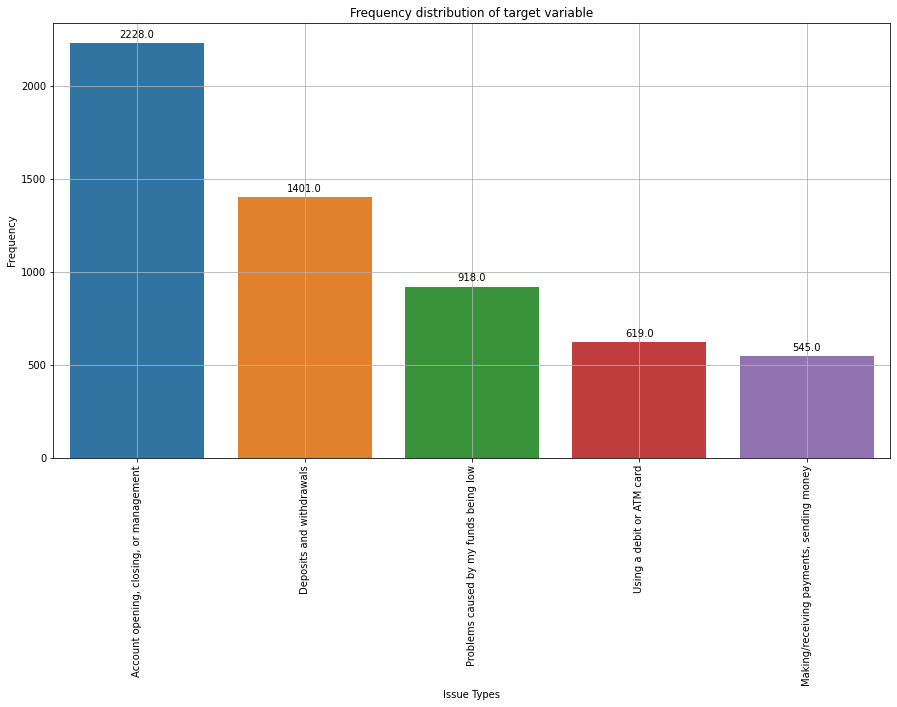

In [38]:
plt.figure(figsize=(15,8))
splot = sns.barplot(x =df.issue.value_counts().index, y = df.issue.value_counts())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("Issue Types")
plt.ylabel("Frequency")
plt.title("Frequency distribution of target variable")
plt.grid()
plt.show()

In [39]:
df_new1 = df[["issue","consumer_complaint_narrative"]]

In [40]:
df_new1['consumer_complaint_narrative'] =  df.consumer_complaint_narrative.apply(lambda i : str(i) )

In [41]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5711 entries, 192044 to 553037
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   issue                         5711 non-null   object
 1   consumer_complaint_narrative  5711 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [42]:
df_new1.shape

(5711, 2)

In [43]:
df_new1['issue'].value_counts()

Account opening, closing, or management     2228
Deposits and withdrawals                    1401
Problems caused by my funds being low        918
Using a debit or ATM card                    619
Making/receiving payments, sending money     545
Name: issue, dtype: int64

In [44]:
df_new1['issue'].value_counts().index

Index(['Account opening, closing, or management', 'Deposits and withdrawals',
       'Problems caused by my funds being low', 'Using a debit or ATM card',
       'Making/receiving payments, sending money'],
      dtype='object')

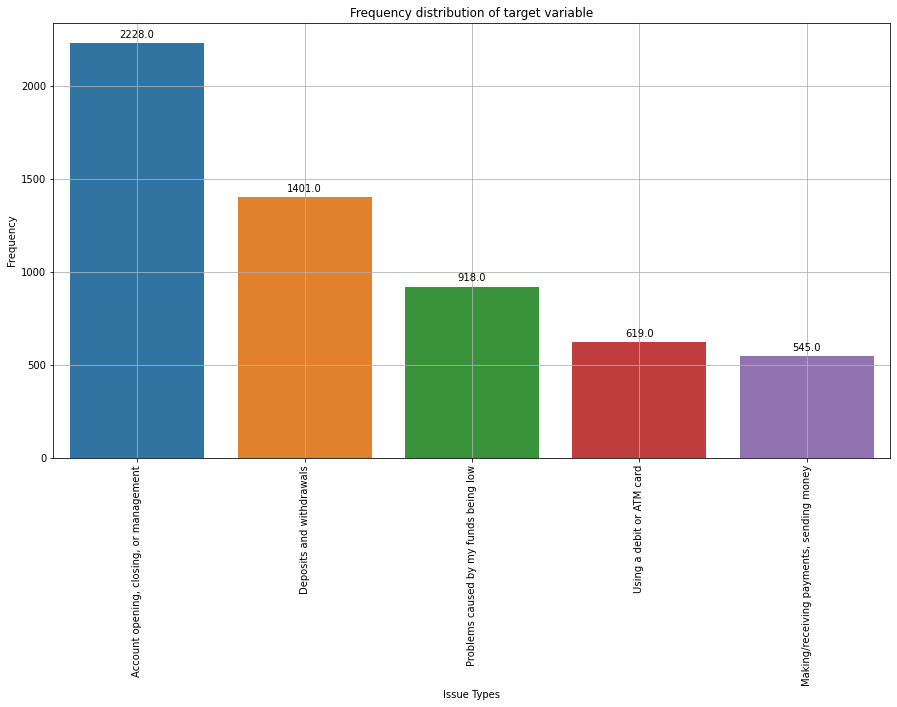

In [45]:
plt.figure(figsize=(15,8))
splot = sns.barplot(x =df_new1['issue'].value_counts().index, y = df_new1['issue'].value_counts())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("Issue Types")
plt.ylabel("Frequency")
plt.title("Frequency distribution of target variable")
plt.grid()
plt.show()

In [50]:
df_new1 = df_new1[(df_new1["issue"] == "Account opening, closing, or management") 
|(df_new1["issue"] == "Deposits and withdrawals")|(df_new1["issue"] == "Problems caused by my funds being low")]

In [51]:
df_new1.shape

(4547, 3)

In [52]:
df_a = df_new1[df_new1["issue"] == "Account opening, closing, or management"]
df_b = df_new1[df_new1["issue"] == "Deposits and withdrawals"]
df_c = df_new1[df_new1["issue"] == "Problems caused by my funds being low"]

In [53]:
df_a.columns

Index(['issue', 'consumer_complaint_narrative', 'narrative_wo_punct'], dtype='object')

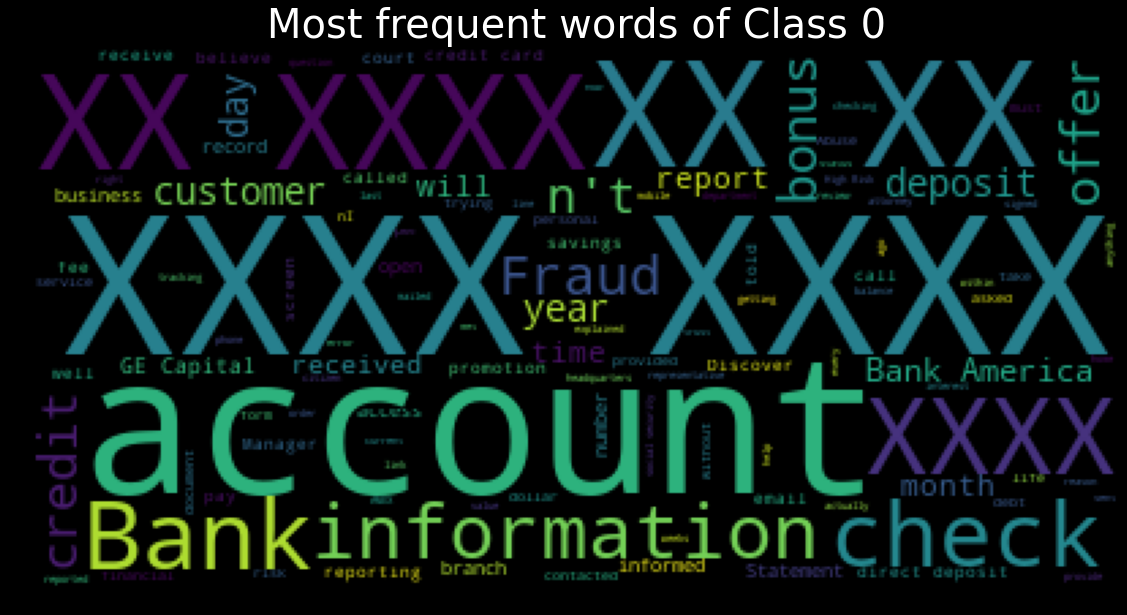

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
wc = WordCloud()
wc.generate(str(df_a['consumer_complaint_narrative']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 0", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

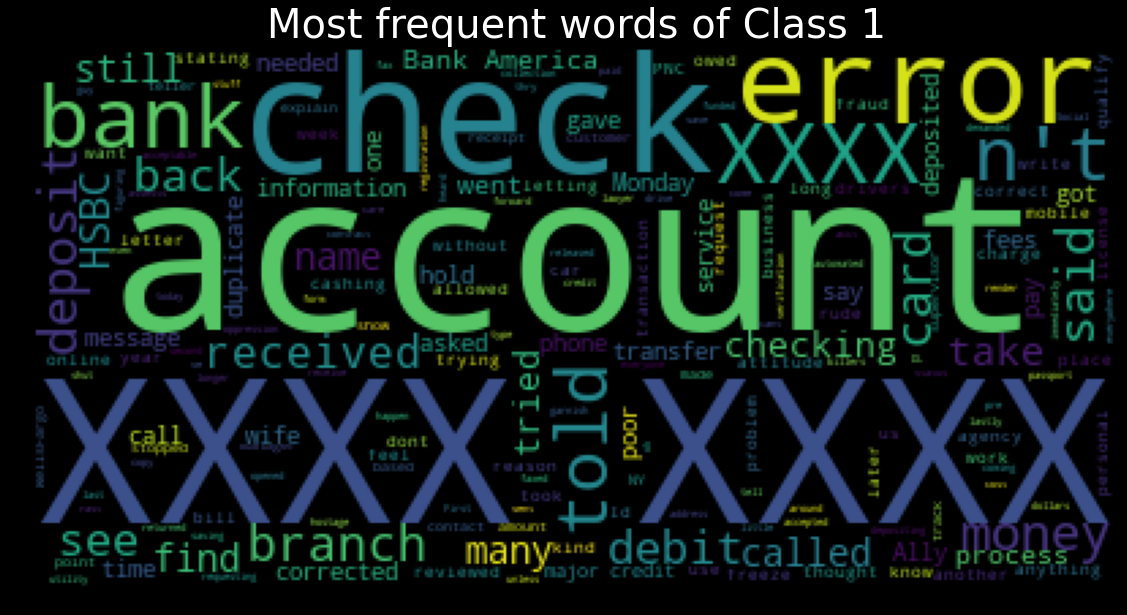

In [55]:
wc.generate(str(df_b['consumer_complaint_narrative']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 1", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

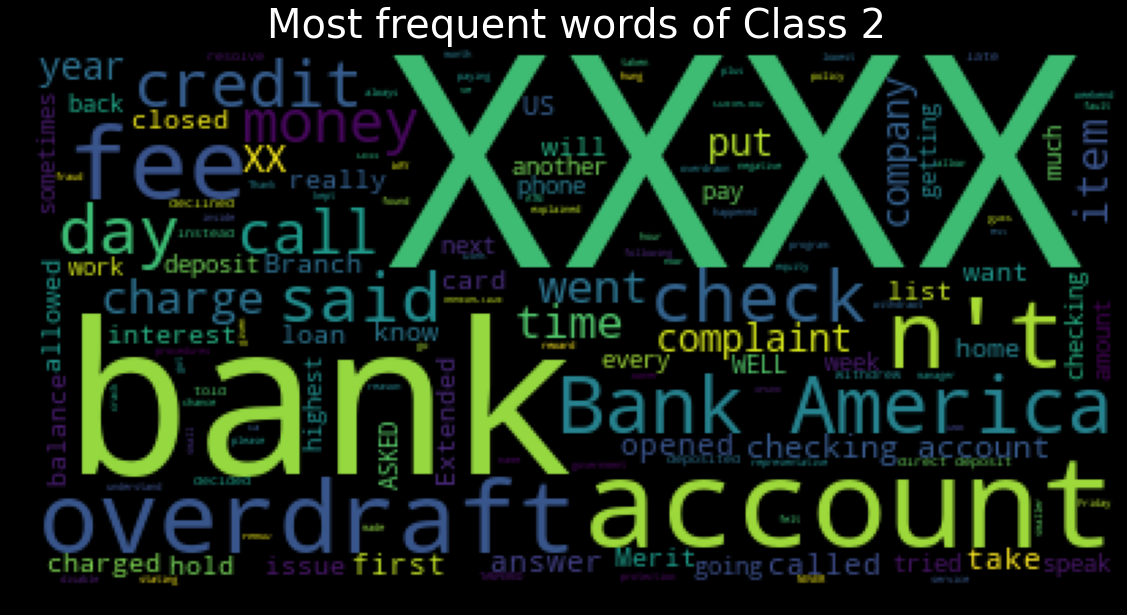

In [56]:
wc.generate(str(df_c['consumer_complaint_narrative']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 2", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

In [47]:
df_new1['narrative_wo_punct'] = df_new1['consumer_complaint_narrative'].map(remove_punctuation)

In [48]:
df_new1['narrative_wo_punct'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX15 and immediately funded it with an automated transfer of 50000 A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX15 Fast forward to today XXXXXXXX15 and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my 50000 was on hold I demanded that my account get shut down and my 50000 returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my 50000 hostage until they got around to figuring stuff out \n
Name: narrative_wo_punct, dtype: object

In [44]:
df_new1['narrative_wo_numbers'] = df_new1['narrative_wo_punct'].map(remove_numbers)

In [45]:
df_new1['narrative_wo_numbers'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX and immediately funded it with an automated transfer of  A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX Fast forward to today XXXXXXXX and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my  was on hold I demanded that my account get shut down and my  returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my  hostage until they got around to figuring stuff out \n
Name: narrative_wo_numbers, dtype: object

In [46]:
df_new1['narrative_wo_numbers_lower_xremoval'] = df_new1['narrative_wo_numbers'].map(xremoval)

In [47]:
df_new1['narrative_wo_numbers_lower_xremoval'].head(1)

192044    i opened an account with m  t bank online on  and immediately funded it with an automated transfer of  a little over a week later i got a letter requesting that i fa in a copy of my dl social and utility bill for address verification which i did on  fast forward to today  and i have not heard anything back so i called m  t bank to find out the status and i was told that they still have not reviewed it and my  was on hold i demanded that my account get shut down and my  returned but i was told that could not happen until they reviewed my information that was faed and released the hold on my account i asked how long that would take and i was told it would take as long as they want which would render my  hostage until they got around to figuring stuff out \n
Name: narrative_wo_numbers_lower_xremoval, dtype: object

In [48]:
df_new1['tokens'] = df_new1['narrative_wo_numbers_lower_xremoval'].map(word_tokenize)


In [49]:
df_new1['tokens'].head(1)

192044    [i, opened, an, account, with, m, t, bank, online, on, and, immediately, funded, it, with, an, automated, transfer, of, a, little, over, a, week, later, i, got, a, letter, requesting, that, i, fa, in, a, copy, of, my, dl, social, and, utility, bill, for, address, verification, which, i, did, on, fast, forward, to, today, and, i, have, not, heard, anything, back, so, i, called, m, t, bank, to, find, out, the, status, and, i, was, told, that, they, still, have, not, reviewed, it, and, my, was, on, hold, i, demanded, that, my, account, get, shut, down, and, my, returned, but, ...]
Name: tokens, dtype: object

In [50]:
df_new1['final_text1'] = df_new1['tokens'].map(concate_tokens)

In [51]:
df_new1.final_text1.head(1)

192044    i opened an account with m t bank online on and immediately funded it with an automated transfer of a little over a week later i got a letter requesting that i fa in a copy of my dl social and utility bill for address verification which i did on fast forward to today and i have not heard anything back so i called m t bank to find out the status and i was told that they still have not reviewed it and my was on hold i demanded that my account get shut down and my returned but i was told that could not happen until they reviewed my information that was faed and released the hold on my account i asked how long that would take and i was told it would take as long as they want which would render my hostage until they got around to figuring stuff out 
Name: final_text1, dtype: object

In [52]:
df_new1['lemma_text'] = df_new1['final_text1'].map(lemma)

In [53]:
df_new1.lemma_text.head(1)

192044    i open an account with m t bank online on and immediately fund it with an automate transfer of a little over a week later i get a letter request that i fa in a copy of my dl social and utility bill for address verification which i do on fast forward to today and i have not hear anything back so i call m t bank to find out the status and i be tell that they still have not review it and my be on hold i demand that my account get shut down and my return but i be tell that could not happen until they review my information that be faed and release the hold on my account i ask how long that would take and i be tell it would take as long as they want which would render my hostage until they get around to figure stuff out
Name: lemma_text, dtype: object

In [54]:
df_new1['lemma_token'] = df_new1['lemma_text'].map(word_tokenize)

In [55]:
df_new1['lemma_token'].head()

192044                                           [i, open, an, account, with, m, t, bank, online, on, and, immediately, fund, it, with, an, automate, transfer, of, a, little, over, a, week, later, i, get, a, letter, request, that, i, fa, in, a, copy, of, my, dl, social, and, utility, bill, for, address, verification, which, i, do, on, fast, forward, to, today, and, i, have, not, hear, anything, back, so, i, call, m, t, bank, to, find, out, the, status, and, i, be, tell, that, they, still, have, not, review, it, and, my, be, on, hold, i, demand, that, my, account, get, shut, down, and, my, return, but, ...]
192334                                                                                 [this, bank, of, america, give, all, my, money, without, let, me, know, to, a, some, type, of, collection, agency, because, they, say, that, they, receive, a, letter, from, a, lawyer, to, take, all, my, money, and, hold, all, my, assests, which, they, cant, even, tell, me, whom, i, owe, with, first

In [56]:
df_new1['wo_stopwords'] = df_new1['lemma_token'].map(remove_stopwords)

In [57]:
df_new1.wo_stopwords.head(1)

192044    [open, online, fund, automate, transfer, week, letter, request, fa, copy, dl, social, utility, bill, address, verification, fast, forward, today, hear, call, find, status, review, hold, demand, shut, return, happen, review, faed, release, hold, long, long, render, hostage, figure, stuff]
Name: wo_stopwords, dtype: object

In [58]:
df_new1['final_text2'] = df_new1['wo_stopwords'].map(concate_tokens)

In [59]:
df_new1.final_text2.head(1)

192044    open online fund automate transfer week letter request fa copy dl social utility bill address verification fast forward today hear call find status review hold demand shut return happen review faed release hold long long render hostage figure stuff 
Name: final_text2, dtype: object

In [60]:
#Independent and Target Variables

In [61]:
features_var = df_new1.final_text2
target_var = df_new1.issue

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(features_var,target_var, test_size=.2,random_state=100)

In [63]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3637,), (910,), (3637,), (910,))

In [64]:
toNumeric = TfidfVectorizer(ngram_range=(1,2),min_df=25)

In [65]:
#Get the vocabulary(unique words) from training data
toNumeric.fit(xtrain)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=25, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [66]:
toNumeric.get_feature_names()[:20]

['ability',
 'absolutely',
 'abuse',
 'abusive',
 'accept',
 'acceptable',
 'access',
 'access fund',
 'access money',
 'access online',
 'accord',
 'accountable',
 'accrue',
 'acct',
 'accumulate',
 'accurate',
 'ach',
 'acknowledge',
 'acquire',
 'action']

In [67]:
# Test the created vocabulary
len(toNumeric.get_feature_names())

1493

In [68]:
# Convert training data into a 'document-term matrix'
sampleTrain_dtm = toNumeric.transform(xtrain)
sampleTrain_dtm

<3637x1493 sparse matrix of type '<class 'numpy.float64'>'
	with 155507 stored elements in Compressed Sparse Row format>

In [69]:
sampleTest_dtm = toNumeric.transform(xtest)
sampleTest_dtm

<910x1493 sparse matrix of type '<class 'numpy.float64'>'
	with 39932 stored elements in Compressed Sparse Row format>

In [70]:
# Let's convert sparse matrix to a dense matrix
sampleTrain_dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
sampleTest_dtm.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08901031,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.11030237, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
#pd.DataFrame(sampleTrain_dtm.toarray(), columns=toNumeric.get_feature_names()).head(1)

In [73]:
from sklearn.preprocessing import LabelBinarizer

In [74]:
list(df_new1.issue.unique())

['Deposits and withdrawals',
 'Account opening, closing, or management',
 'Problems caused by my funds being low']

In [75]:
lb = LabelBinarizer()
lb.fit_transform(list(df_new1.issue.unique()))

lb.classes_

array(['Account opening, closing, or management',
       'Deposits and withdrawals',
       'Problems caused by my funds being low'], dtype='<U39')

In [76]:
ytrain.head()

215424                   Deposits and withdrawals
303700                   Deposits and withdrawals
552684      Problems caused by my funds being low
516406      Problems caused by my funds being low
296387    Account opening, closing, or management
Name: issue, dtype: object

In [77]:
y_train = lb.fit_transform(ytrain)
y_test = lb.transform(ytest)

In [184]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score,roc_auc_score,plot_confusion_matrix,plot_roc_curve

In [403]:
support = LinearSVC(random_state=20)
support.fit(sampleTrain_dtm, ytrain)
predicted= support.predict(sampleTest_dtm)

print(classification_report(ytest,predicted))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.79      0.81      0.80       439
               Deposits and withdrawals       0.67      0.66      0.66       285
  Problems caused by my funds being low       0.73      0.69      0.71       186

                               accuracy                           0.74       910
                              macro avg       0.73      0.72      0.72       910
                           weighted avg       0.74      0.74      0.74       910



In [405]:
print(classification_report(ytrain,support.predict(sampleTrain_dtm)))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.89      0.94      0.91      1789
               Deposits and withdrawals       0.88      0.83      0.85      1116
  Problems caused by my funds being low       0.90      0.87      0.89       732

                               accuracy                           0.89      3637
                              macro avg       0.89      0.88      0.88      3637
                           weighted avg       0.89      0.89      0.89      3637



In [404]:
print(classification_report(ytest,predicted))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.79      0.81      0.80       439
               Deposits and withdrawals       0.67      0.66      0.66       285
  Problems caused by my funds being low       0.73      0.69      0.71       186

                               accuracy                           0.74       910
                              macro avg       0.73      0.72      0.72       910
                           weighted avg       0.74      0.74      0.74       910



In [185]:
accuracy_score(ytest,predicted)

0.7395604395604396

Using SVC

In [79]:
# {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [186]:
clf = OneVsRestClassifier(SVC()).fit(sampleTrain_dtm, y_train)

In [187]:
predicted_labels = clf.predict(sampleTest_dtm)

In [188]:
predicted_scores = clf.decision_function(sampleTest_dtm)


In [189]:
predicted_labels[:2]

array([[1, 0, 0],
       [0, 1, 0]])

In [190]:
pred_inversed = lb.inverse_transform(predicted_labels)
y_test_inversed = lb.inverse_transform(y_test)

In [191]:
pred_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [192]:
y_test_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [193]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,classification_report

In [194]:
print('Accuracy score: ', accuracy_score(y_test, predicted_labels))
print('F1 score: ', f1_score(y_test, predicted_labels, average='micro'))
print('Average precision score: ', average_precision_score(y_test, predicted_labels, average='micro'))
print('Average recall score: ', recall_score(y_test, predicted_labels, average='micro'))

Accuracy score:  0.7021978021978021
F1 score:  0.7527377521613833
Average precision score:  0.6621165501165501
Average recall score:  0.7175824175824176


In [200]:
print(classification_report(y_train, clf.predict(sampleTrain_dtm)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1789
           1       0.97      0.85      0.91      1116
           2       0.94      0.86      0.90       732

   micro avg       0.95      0.91      0.93      3637
   macro avg       0.95      0.89      0.92      3637
weighted avg       0.95      0.91      0.93      3637
 samples avg       0.91      0.91      0.91      3637



In [199]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       439
           1       0.76      0.61      0.68       285
           2       0.78      0.64      0.70       186

   micro avg       0.79      0.72      0.75       910
   macro avg       0.78      0.69      0.73       910
weighted avg       0.79      0.72      0.75       910
 samples avg       0.71      0.72      0.71       910



In [90]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [91]:
# from sklearn.model_selection import GridSearchCV
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# # fitting the model for grid search
# grid.fit(sampleTrain_dtm, y_train)

In [92]:
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [93]:
# grid_predictions = grid.predict(sampleTest_dtm)
 
# # print classification report
# print(classification_report(y_test, grid_predictions))

Using KNN Classifier

In [201]:
clf = OneVsRestClassifier(KNeighborsClassifier()).fit(sampleTrain_dtm, y_train)

In [202]:
predicted_labels = clf.predict(sampleTest_dtm)

In [203]:
predicted_labels[:2]

array([[1, 0, 0],
       [0, 1, 0]])

In [204]:
pred_inversed = lb.inverse_transform(predicted_labels)
y_test_inversed = lb.inverse_transform(y_test)

In [205]:
pred_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [206]:
y_test_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [207]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,classification_report

In [101]:
print('Accuracy score: ', accuracy_score(y_test, predicted_labels))
print('F1 score: ', f1_score(y_test, predicted_labels, average='micro'))
print('Average precision score: ', average_precision_score(y_test, predicted_labels, average='micro'))
print('Average recall score: ', recall_score(y_test, predicted_labels, average='micro'))

Accuracy score:  0.6252747252747253
F1 score:  0.655907780979827
Average precision score:  0.5561585081585081
Average recall score:  0.6252747252747253


In [208]:
print(classification_report(y_train, clf.predict(sampleTrain_dtm)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1789
           1       0.86      0.53      0.66      1116
           2       0.86      0.61      0.71       732

   micro avg       0.81      0.73      0.77      3637
   macro avg       0.83      0.68      0.74      3637
weighted avg       0.82      0.73      0.76      3637
 samples avg       0.73      0.73      0.73      3637



In [102]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74       439
           1       0.64      0.43      0.52       285
           2       0.73      0.52      0.61       186

   micro avg       0.69      0.63      0.66       910
   macro avg       0.69      0.58      0.62       910
weighted avg       0.69      0.63      0.64       910
 samples avg       0.63      0.63      0.63       910



Using Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [209]:
clf = OneVsRestClassifier(LogisticRegression()).fit(sampleTrain_dtm, y_train)

In [210]:
predicted_labels = clf.predict(sampleTest_dtm)

In [211]:
predicted_scores = clf.decision_function(sampleTest_dtm)


In [212]:
predicted_labels[:2]

array([[1, 0, 0],
       [0, 1, 0]])

In [213]:
pred_inversed = lb.inverse_transform(predicted_labels)
y_test_inversed = lb.inverse_transform(y_test)

In [214]:
pred_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [215]:
y_test_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [111]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,classification_report

In [112]:
print('Accuracy score: ', accuracy_score(y_test, predicted_labels))
print('F1 score: ', f1_score(y_test, predicted_labels, average='micro'))
print('Average precision score: ', average_precision_score(y_test, predicted_labels, average='micro'))
print('Average recall score: ', recall_score(y_test, predicted_labels, average='micro'))

Accuracy score:  0.6824175824175824
F1 score:  0.7384435342305442
Average precision score:  0.6498067639494423
Average recall score:  0.6934065934065934


In [216]:
print(classification_report(y_train, clf.predict(sampleTrain_dtm)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1789
           1       0.85      0.63      0.72      1116
           2       0.86      0.65      0.74       732

   micro avg       0.85      0.75      0.80      3637
   macro avg       0.85      0.72      0.77      3637
weighted avg       0.85      0.75      0.79      3637
 samples avg       0.75      0.75      0.75      3637



In [113]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       439
           1       0.75      0.59      0.66       285
           2       0.78      0.59      0.67       186

   micro avg       0.79      0.69      0.74       910
   macro avg       0.78      0.66      0.71       910
weighted avg       0.79      0.69      0.73       910
 samples avg       0.69      0.69      0.69       910



Using Multinomial NB

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [217]:
clf = OneVsRestClassifier(MultinomialNB()).fit(sampleTrain_dtm, y_train)

In [218]:
predicted_labels = clf.predict(sampleTest_dtm)

In [219]:
predicted_labels[:2]

array([[1, 0, 0],
       [0, 1, 0]])

In [220]:
pred_inversed = lb.inverse_transform(predicted_labels)
y_test_inversed = lb.inverse_transform(y_test)

In [221]:
pred_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [222]:
y_test_inversed[:2]

array(['Account opening, closing, or management',
       'Deposits and withdrawals'], dtype='<U39')

In [121]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,classification_report

In [122]:
print('Accuracy score: ', accuracy_score(y_test, predicted_labels))
print('F1 score: ', f1_score(y_test, predicted_labels, average='micro'))
print('Average precision score: ', average_precision_score(y_test, predicted_labels, average='micro'))
print('Average recall score: ', recall_score(y_test, predicted_labels, average='micro'))

Accuracy score:  0.6582417582417582
F1 score:  0.7250147841513898
Average precision score:  0.6375145980779783
Average recall score:  0.6736263736263737


In [223]:
print(classification_report(y_train, clf.predict(sampleTrain_dtm)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1789
           1       0.83      0.50      0.62      1116
           2       0.82      0.65      0.73       732

   micro avg       0.81      0.70      0.75      3637
   macro avg       0.82      0.66      0.72      3637
weighted avg       0.81      0.70      0.74      3637
 samples avg       0.69      0.70      0.69      3637



In [123]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       439
           1       0.79      0.49      0.60       285
           2       0.79      0.60      0.68       186

   micro avg       0.78      0.67      0.73       910
   macro avg       0.79      0.64      0.70       910
weighted avg       0.79      0.67      0.72       910
 samples avg       0.67      0.67      0.67       910



Using Bagging

In [124]:
from sklearn.ensemble import BaggingClassifier,StackingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [234]:
bg = BaggingClassifier(base_estimator=LogisticRegression())
bg_model2 = bg.fit(sampleTrain_dtm,ytrain)

accuracy_score(ytest,bg_model2.predict(sampleTest_dtm))

0.7648351648351648

In [126]:
print(classification_report(ytest,bg_model2.predict(sampleTest_dtm)))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.79      0.85      0.82       439
               Deposits and withdrawals       0.72      0.69      0.70       285
  Problems caused by my funds being low       0.75      0.67      0.71       186

                               accuracy                           0.76       910
                              macro avg       0.75      0.73      0.74       910
                           weighted avg       0.76      0.76      0.76       910



In [235]:
print(classification_report(ytrain,bg_model2.predict(sampleTrain_dtm)))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.82      0.91      0.86      1789
               Deposits and withdrawals       0.83      0.73      0.77      1116
  Problems caused by my funds being low       0.84      0.76      0.80       732

                               accuracy                           0.83      3637
                              macro avg       0.83      0.80      0.81      3637
                           weighted avg       0.83      0.83      0.82      3637



In [127]:
ada_boost = AdaBoostClassifier()
ada_boost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [128]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100],
               "learning_rate":[0.0001, 0.001, 0.01, 0.1, 1.0]
               }
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1,verbose=2)
#Fitting the grid to the training data
grid_object.fit(sampleTrain_dtm, ytrain)
#Extracting the best parameters
grid_object.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   24.5s finished


{'learning_rate': 0.1, 'n_estimators': 100}

Using Stacking

In [129]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


In [130]:
grid.fit(sampleTrain_dtm, ytrain)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.574, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.585, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.569, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.499, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.499, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.497, total=   4.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.1min finished


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [244]:
from sklearn.preprocessing import LabelEncoder

In [245]:
le = LabelEncoder()

In [246]:
le.fit_transform(ytrain)

array([1, 1, 2, ..., 0, 1, 1])

In [247]:
SV = SVC(C=1,gamma=1,kernel='rbf')
base = [("SVC",SV)]
# type your code here
sc = StackingClassifier(estimators = base, final_estimator = AdaBoostClassifier(n_estimators=100,learning_rate=0.1))
stack_model = sc.fit(sampleTrain_dtm, le.fit_transform(ytrain))

In [248]:
print(classification_report(le.fit_transform(ytrain),stack_model.predict(sampleTrain_dtm)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1789
           1       0.95      0.89      0.92      1116
           2       0.91      0.91      0.91       732

    accuracy                           0.93      3637
   macro avg       0.93      0.92      0.93      3637
weighted avg       0.93      0.93      0.93      3637



In [237]:
print(classification_report(ytrain,stack_model.predict(sampleTrain_dtm)))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.93      0.97      0.95      1789
               Deposits and withdrawals       0.95      0.89      0.92      1116
  Problems caused by my funds being low       0.91      0.91      0.91       732

                               accuracy                           0.93      3637
                              macro avg       0.93      0.92      0.93      3637
                           weighted avg       0.93      0.93      0.93      3637



In [249]:
print(classification_report(le.transform(ytest),stack_model.predict(sampleTest_dtm)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       439
           1       0.71      0.69      0.70       285
           2       0.75      0.74      0.75       186

    accuracy                           0.77       910
   macro avg       0.76      0.76      0.76       910
weighted avg       0.77      0.77      0.77       910



In [132]:
print(classification_report(ytest,stack_model.predict(sampleTest_dtm)))

                                         precision    recall  f1-score   support

Account opening, closing, or management       0.82      0.84      0.83       439
               Deposits and withdrawals       0.71      0.69      0.70       285
  Problems caused by my funds being low       0.75      0.74      0.75       186

                               accuracy                           0.77       910
                              macro avg       0.76      0.76      0.76       910
                           weighted avg       0.77      0.77      0.77       910



In [262]:
roc_auc_score(le.transform(ytrain),stack_model.predict_proba(sampleTrain_dtm),multi_class="ovr")

0.9736353196957799

In [260]:
roc_auc_score(le.transform(ytest),y_prob_pred_cnb,multi_class="ovr")

0.872617144508145

In [269]:
from sklearn.metrics import multilabel_confusion_matrix

In [290]:
confusion_matrix(le.fit_transform(ytrain),stack_model.predict(sampleTrain_dtm))

array([[1738,   29,   22],
       [  87,  988,   41],
       [  43,   26,  663]])

In [293]:
confusion_matrix(le.transform(ytest),stack_model.predict(sampleTest_dtm))

array([[368,  57,  14],
       [ 57, 196,  32],
       [ 25,  23, 138]])

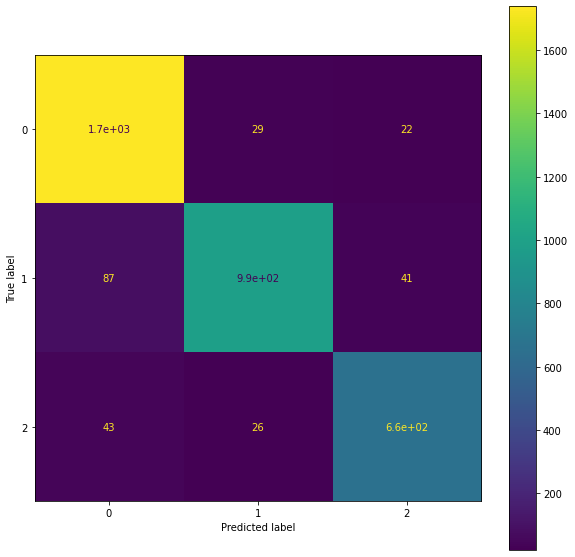

In [288]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(sc, sampleTrain_dtm, le.transform(ytrain), ax=ax)
plt.show()

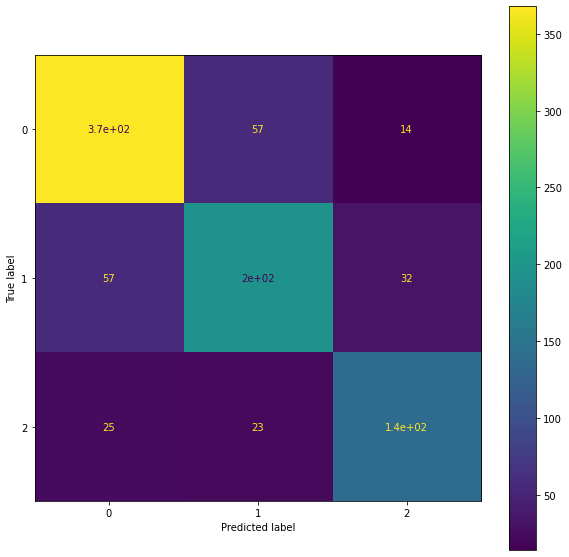

In [289]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(sc, sampleTest_dtm, le.transform(ytest), ax=ax)
plt.show()

In [133]:
#                                          precision    recall  f1-score   support

# Account opening, closing, or management       0.80      0.85      0.83       439
#                Deposits and withdrawals       0.72      0.67      0.70       285
#   Problems caused by my funds being low       0.75      0.73      0.74       186

#                                accuracy                           0.77       910
#                               macro avg       0.76      0.75      0.75       910
#                            weighted avg       0.77      0.77      0.77       910

In [134]:
# precision    recall  f1-score   support

# Account opening, closing, or management       0.81      0.83      0.82       439
#                Deposits and withdrawals       0.71      0.68      0.70       285
#   Problems caused by my funds being low       0.76      0.75      0.75       186

#                                accuracy                           0.77       910
#                               macro avg       0.76      0.76      0.76       910
#                            weighted avg       0.77      0.77      0.77       910
#adaboost with nestimators 100

In [135]:
#                                         precision    recall  f1-score   support

# Account opening, closing, or management       0.81      0.86      0.84       439
#                Deposits and withdrawals       0.72      0.68      0.70       285
#   Problems caused by my funds being low       0.74      0.71      0.73       186

#                                accuracy                           0.77       910
#                               macro avg       0.76      0.75      0.75       910
#                            weighted avg       0.77      0.77      0.77       910
# min_Df=5,nestimators=50 default

In [136]:
df_new1["issue"].value_counts()

Account opening, closing, or management    2228
Deposits and withdrawals                   1401
Problems caused by my funds being low       918
Name: issue, dtype: int64

In [137]:
df_a = df_new1[df_new1["issue"] == "Account opening, closing, or management"]
df_b = df_new1[df_new1["issue"] == "Deposits and withdrawals"]
df_c = df_new1[df_new1["issue"] == "Problems caused by my funds being low"]

In [138]:
df_a.columns

Index(['issue', 'consumer_complaint_narrative', 'narrative_wo_punct',
       'narrative_wo_numbers', 'narrative_wo_numbers_lower_xremoval', 'tokens',
       'final_text1', 'lemma_text', 'lemma_token', 'wo_stopwords',
       'final_text2'],
      dtype='object')

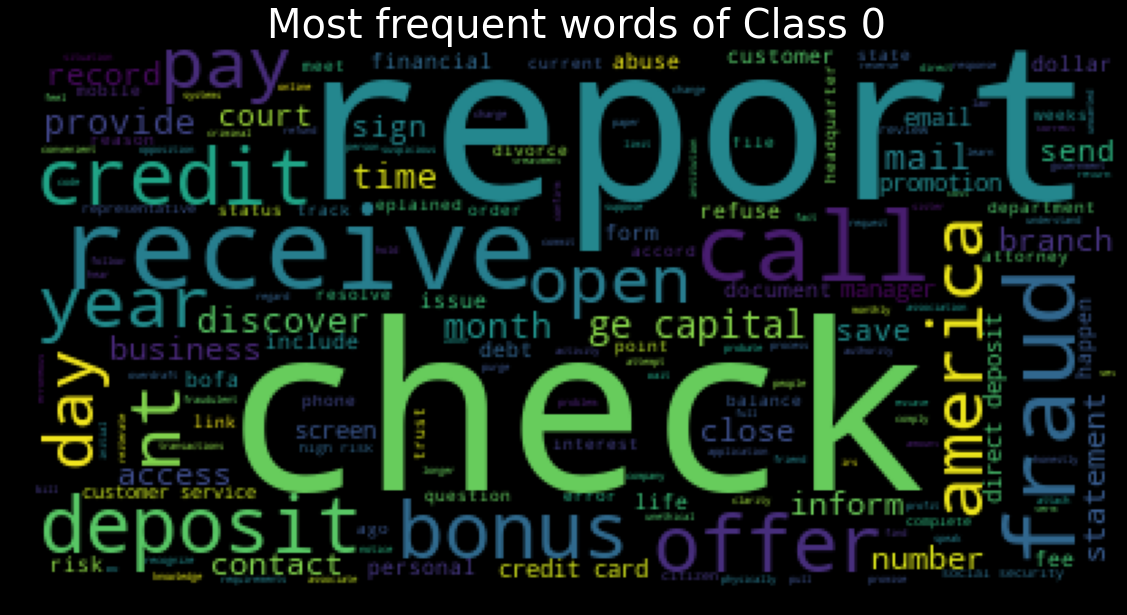

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
wc = WordCloud()
wc.generate(str(df_a['final_text2']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 0", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

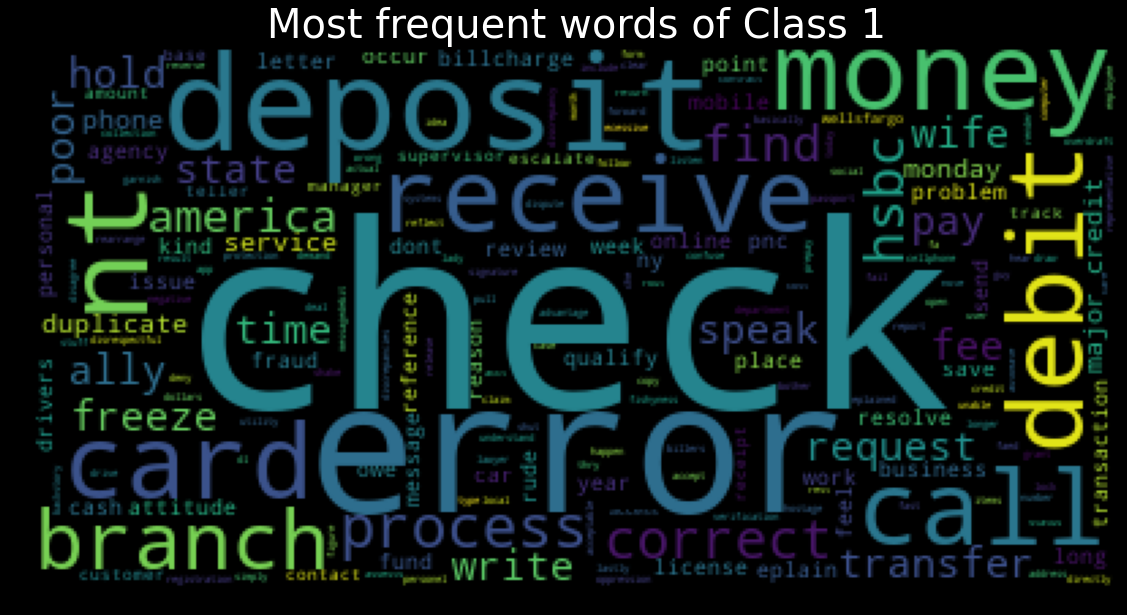

In [337]:
wc.generate(str(df_b['final_text2']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 1", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

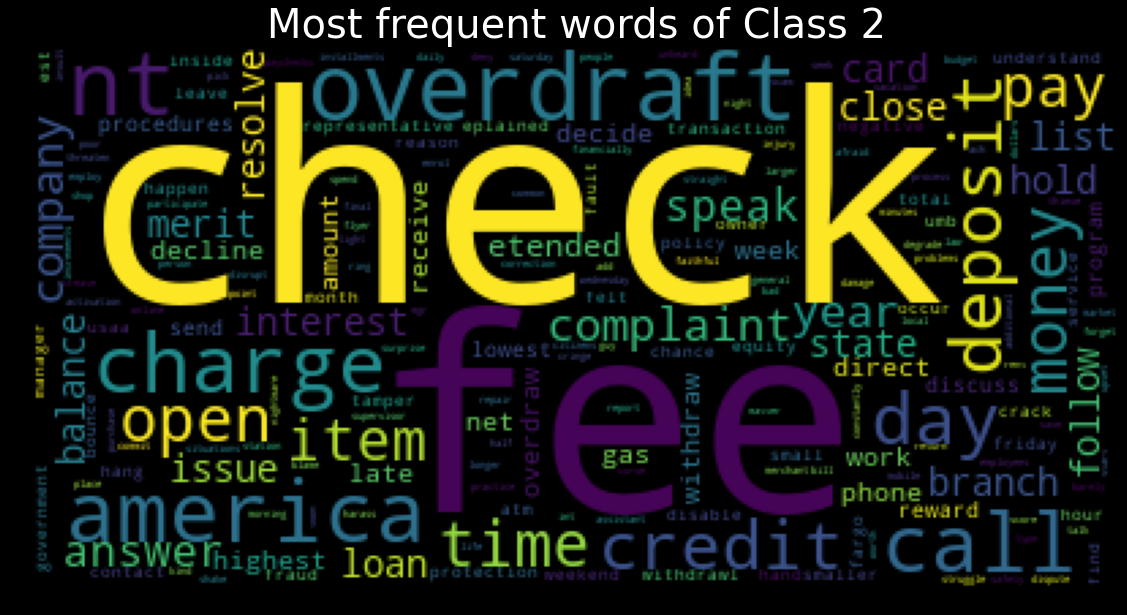

In [338]:
wc.generate(str(df_c['final_text2']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words of Class 2", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

In [142]:
df_a.columns

Index(['issue', 'consumer_complaint_narrative', 'narrative_wo_punct',
       'narrative_wo_numbers', 'narrative_wo_numbers_lower_xremoval', 'tokens',
       'final_text1', 'lemma_text', 'lemma_token', 'wo_stopwords',
       'final_text2'],
      dtype='object')

In [143]:
df_a.issue.unique()

array(['Account opening, closing, or management'], dtype=object)

In [144]:
for i in df_a.final_text2:
  s = str(i).split(" ")
  print(s)

['trustee', 'sister', 'estate', 'pass', 'probate', 'pourover', 'title', 'trust', 'wo', 'beneficiary', 'trust', 'contact', 'discover', 'online', 'time', 'sister', 'save', 'contact', 'initiate', 'send', 'certify', 'document', 'total', 'month', 'state', 'trust', 'question', 'beneficiaries', 'list', 'niece', 'nephew', 'death', 'report', 'irs', 'estate', 'current', 'receive', 'paper', 'answer', 'question', 'wo', 'nt', 'nt', 'recognize', 'authority', 'county', 'wa', 'superior', 'court', 'probate', 'paper', 'refuse', 'recognize', 'authority', 'refuse', 'bundle', 'document', 'send', 'attorneys', 'impasse', '']
['sign', 'pnc', 'promotion', 'direct', 'deposit', 'dollars', 'bill', 'pay', 'month', 'sign', 'bill', 'pay', 'direct', 'deposit', 'prior', 'sign', 'call', 'customer', 'service', 'time', 'confirm', 'promotion', 'set', 'promotion', 'pay', 'follow', 'month', 'learn', 'associate', 'set', 'promotion', 'receive', 'dollar', 'credit', 'dollar', 'monthly', 'direct', 'deposit', 'receive', 'promotio

In [145]:

label_counts = dict()

In [146]:
for i in df_a.final_text2:
  s = str(i).split(" ")
  for j in s:
    if j in label_counts:
      label_counts[j]+=1
    else:
      label_counts[j]=1

In [147]:
label_counts

{'trustee': 37,
 'sister': 65,
 'estate': 81,
 'pass': 120,
 'probate': 21,
 'pourover': 1,
 'title': 50,
 'trust': 189,
 'wo': 63,
 'beneficiary': 43,
 'contact': 698,
 'discover': 220,
 'online': 575,
 'time': 1381,
 'save': 580,
 'initiate': 41,
 'send': 991,
 'certify': 46,
 'document': 306,
 'total': 152,
 'month': 413,
 'state': 870,
 'question': 199,
 'beneficiaries': 23,
 'list': 152,
 'niece': 5,
 'nephew': 3,
 'death': 77,
 'report': 934,
 'irs': 75,
 'current': 108,
 'receive': 1609,
 'paper': 99,
 'answer': 178,
 'nt': 1343,
 'recognize': 29,
 'authority': 28,
 'county': 11,
 'wa': 13,
 'superior': 7,
 'court': 83,
 'refuse': 530,
 'bundle': 3,
 'attorneys': 15,
 'impasse': 1,
 '': 2228,
 'sign': 392,
 'pnc': 241,
 'promotion': 253,
 'direct': 429,
 'deposit': 1173,
 'dollars': 133,
 'bill': 325,
 'pay': 1169,
 'prior': 107,
 'call': 2224,
 'customer': 832,
 'service': 982,
 'confirm': 211,
 'set': 214,
 'follow': 280,
 'learn': 67,
 'associate': 111,
 'dollar': 46,
 'credi

In [295]:
 del label_counts['']

In [296]:
dfcount = pd.DataFrame(label_counts,index=[0])
dfcount

open  check  merit  flyer  ...  temper  tantrum  crack  algorithm
0   194   1267     12      2  ...       1        1      2          1

[1 rows x 4465 columns]

In [297]:
df_stack=dfcount.stack(level=0) 

In [298]:
df_stack.sort_values(ascending=False,inplace=True)

In [353]:
top10 = df_stack[:10].unstack().columns.to_list()

In [299]:
df_stack[:5]

0  fee          2616
   charge       1936
   overdraft    1652
   check        1267
   balance       740
dtype: int64

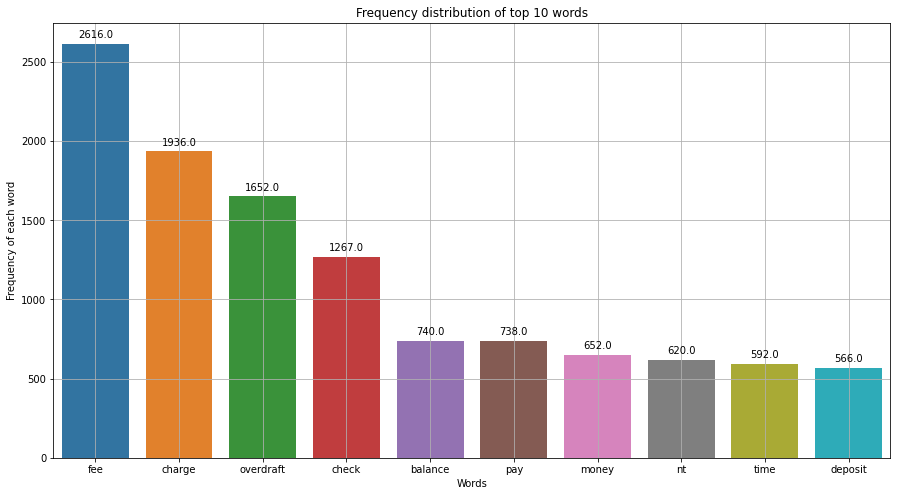

In [358]:
plt.figure(figsize=(15,8))
splot = sns.barplot(y=df_stack[:10],x =top10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Words")
plt.ylabel("Frequency of each word")
plt.title("Frequency distribution of top 10 words")
plt.grid()
plt.show()

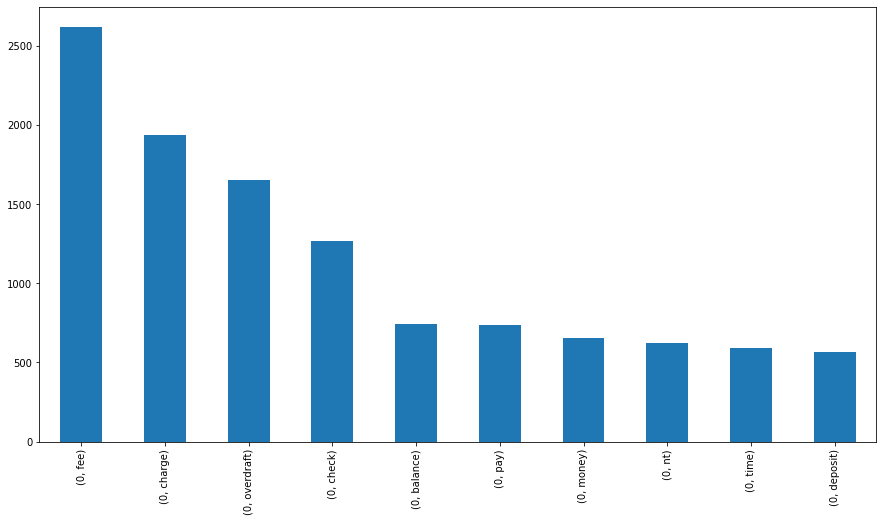

In [301]:
plt.figure(figsize=(15,8))
df_stack[:10].plot(kind="bar")
plt.show()

In [302]:
df_b.columns

Index(['issue', 'consumer_complaint_narrative', 'narrative_wo_punct',
       'narrative_wo_numbers', 'narrative_wo_numbers_lower_xremoval', 'tokens',
       'final_text1', 'lemma_text', 'lemma_token', 'wo_stopwords',
       'final_text2'],
      dtype='object')

In [303]:
df_b.issue.unique()

array(['Deposits and withdrawals'], dtype=object)

In [359]:
for i in df_b.final_text2:
  s = str(i).split(" ")
  print(s)

['open', 'online', 'fund', 'automate', 'transfer', 'week', 'letter', 'request', 'fa', 'copy', 'dl', 'social', 'utility', 'bill', 'address', 'verification', 'fast', 'forward', 'today', 'hear', 'call', 'find', 'status', 'review', 'hold', 'demand', 'shut', 'return', 'happen', 'review', 'faed', 'release', 'hold', 'long', 'long', 'render', 'hostage', 'figure', 'stuff', '']
['america', 'money', 'type', 'collection', 'agency', 'receive', 'letter', 'lawyer', 'money', 'hold', 'assests', 'owe', 'dont', 'owe', 'thry', 'garnish', 'money', 'agency', 'acct', '']
['contract', 'guy', 'pnc', 'cash', 'check', 'year', 'drivers', 'license', 'prepay', 'card', 'longer', 'cash', 'check', 'major', 'credit', 'card', 'work', 'work', 'nt', 'passport', 'cost', 'dollars', 'nt', 'kind', 'money', 'lastly', 'car', 'registration', 'nt', 'car', 'oppression', 'poor', 'qualify', 'major', 'credit', 'card', 'pay', 'bill', 'qualify', 'drivers', 'license', 'debit', 'card', 'drive', 'debit', 'card', 'major', 'credit', 'card',

In [360]:
label_counts = dict()

In [361]:
for i in df_b.final_text2:
  s = str(i).split(" ")
  for j in s:
    if j in label_counts:
      label_counts[j]+=1
    else:
      label_counts[j]=1

In [362]:
label_counts

{'open': 384,
 'online': 307,
 'fund': 1353,
 'automate': 20,
 'transfer': 602,
 'week': 164,
 'letter': 356,
 'request': 390,
 'fa': 35,
 'copy': 199,
 'dl': 8,
 'social': 86,
 'utility': 7,
 'bill': 272,
 'address': 169,
 'verification': 31,
 'fast': 10,
 'forward': 38,
 'today': 190,
 'hear': 65,
 'call': 1552,
 'find': 344,
 'status': 58,
 'review': 94,
 'hold': 809,
 'demand': 28,
 'shut': 17,
 'return': 470,
 'happen': 291,
 'faed': 22,
 'release': 231,
 'long': 113,
 'render': 4,
 'hostage': 9,
 'figure': 26,
 'stuff': 7,
 '': 1401,
 'america': 530,
 'money': 1964,
 'type': 48,
 'collection': 28,
 'agency': 36,
 'receive': 888,
 'lawyer': 26,
 'assests': 1,
 'owe': 92,
 'dont': 27,
 'thry': 6,
 'garnish': 15,
 'acct': 135,
 'contract': 44,
 'guy': 28,
 'pnc': 117,
 'cash': 670,
 'check': 3703,
 'year': 111,
 'drivers': 15,
 'license': 43,
 'prepay': 22,
 'card': 734,
 'longer': 89,
 'major': 21,
 'credit': 672,
 'work': 313,
 'nt': 957,
 'passport': 4,
 'cost': 46,
 'dollars': 1

In [363]:
del label_counts['']

In [364]:
dfcount = pd.DataFrame(label_counts,index=[0])
dfcount

open  online  fund  automate  ...  backstory  becaus  represenative  sifnature
0   384     307  1353        20  ...          1       1              1          1

[1 rows x 6503 columns]

In [365]:
df_stack=dfcount.stack(level=0) 

In [366]:
df_stack.sort_values(ascending=False,inplace=True)

In [367]:
df_stack[:5]

0  check      3703
   deposit    2031
   money      1964
   call       1552
   fund       1353
dtype: int64

In [368]:
top10 = df_stack[:10].unstack().columns.to_list()
top10

['check',
 'deposit',
 'money',
 'call',
 'fund',
 'nt',
 'receive',
 'time',
 'hold',
 'charge']

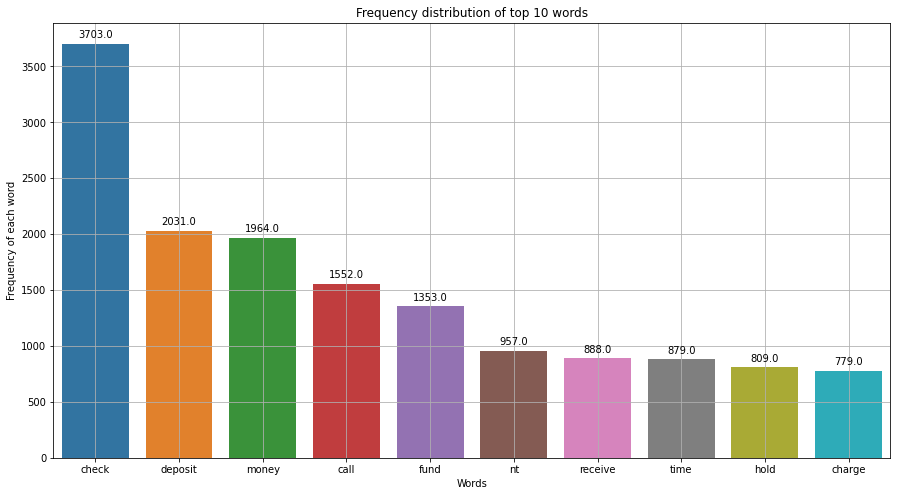

In [369]:
plt.figure(figsize=(15,8))
splot = sns.barplot(y=df_stack[:10],x =top10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Words")
plt.ylabel("Frequency of each word")
plt.title("Frequency distribution of top 10 words")
plt.grid()
plt.show()

In [370]:
df_c.columns

Index(['issue', 'consumer_complaint_narrative', 'narrative_wo_punct',
       'narrative_wo_numbers', 'narrative_wo_numbers_lower_xremoval', 'tokens',
       'final_text1', 'lemma_text', 'lemma_token', 'wo_stopwords',
       'final_text2'],
      dtype='object')

In [371]:
df_c.issue.unique()

array(['Problems caused by my funds being low'], dtype=object)

In [372]:
for i in df_c.final_text2:
  s = str(i).split(" ")
  print(s)

['open', 'check', 'merit', 'flyer', 'send', 'state', 'receive', 'worth', 'credit', 'follow', 'procedures', 'open', 'procedures', 'increments', 'open', 'check', 'mobile', 'enrol', 'int', 'merit', 'reward', 'program', 'participate', 'direct', 'deposit', 'program', 'open', 'receive', 'fee', 'state', 'overdrafts', 'discuss', 'tight', 'budget', 'call', 'online', 'constantly', 'place', 'blame', 'merchant', 'hold', 'money', 'days', 'purchase', 'money', 'charge', 'overdraft', 'fee', 'months', 'open', 'check', 'activation', 'reward', 'merit', 'fee', 'merit', 'charge', '']
['citizens', 'general', 'overdraft', 'situations', 'charge', 'highest', 'check', 'nt', 'item', 'larger', 'item', 'overdraw', 'lowest', 'item', 'lowest', 'item', 'fee', 'money', 'talk', 'nt', 'highest', 'pay', 'nt', 'matter', 'pay', 'charge', 'poor', 'practice', 'nt', '']
['america', 'representative', 'call', 'days', 'straight', 'call', 'hang', 'answer', 'time', 'days', 'leave', 'call', 'est', 'est', 'half', 'hour', 'hours', 'y

In [373]:
label_counts = dict()

In [374]:
for i in df_c.final_text2:
  s = str(i).split(" ")
  for j in s:
    if j in label_counts:
      label_counts[j]+=1
    else:
      label_counts[j]=1

In [375]:
label_counts

{'open': 194,
 'check': 1267,
 'merit': 12,
 'flyer': 2,
 'send': 175,
 'state': 254,
 'receive': 287,
 'worth': 25,
 'credit': 413,
 'follow': 90,
 'procedures': 7,
 'increments': 1,
 'mobile': 29,
 'enrol': 10,
 'int': 1,
 'reward': 5,
 'program': 32,
 'participate': 7,
 'direct': 109,
 'deposit': 566,
 'fee': 2616,
 'overdrafts': 110,
 'discuss': 19,
 'tight': 8,
 'budget': 10,
 'call': 534,
 'online': 188,
 'constantly': 19,
 'place': 105,
 'blame': 6,
 'merchant': 55,
 'hold': 117,
 'money': 652,
 'days': 242,
 'purchase': 204,
 'charge': 1936,
 'overdraft': 1652,
 'months': 97,
 'activation': 2,
 '': 918,
 'citizens': 49,
 'general': 11,
 'situations': 8,
 'highest': 29,
 'nt': 620,
 'item': 142,
 'larger': 21,
 'overdraw': 328,
 'lowest': 21,
 'talk': 63,
 'pay': 738,
 'matter': 70,
 'poor': 17,
 'practice': 166,
 'america': 356,
 'representative': 96,
 'straight': 7,
 'hang': 18,
 'answer': 52,
 'time': 592,
 'leave': 111,
 'est': 4,
 'half': 20,
 'hour': 17,
 'hours': 73,
 'ye

In [376]:
del label_counts['']

In [377]:
dfcount = pd.DataFrame(label_counts,index=[0])
dfcount

open  check  merit  flyer  ...  temper  tantrum  crack  algorithm
0   194   1267     12      2  ...       1        1      2          1

[1 rows x 4465 columns]

In [378]:
df_stack=dfcount.stack(level=0) 

In [379]:
df_stack.sort_values(ascending=False,inplace=True)

In [380]:
df_stack[:5]

0  fee          2616
   charge       1936
   overdraft    1652
   check        1267
   balance       740
dtype: int64

In [381]:
top10 = df_stack[:10].unstack().columns.to_list()
top10

['fee',
 'charge',
 'overdraft',
 'check',
 'balance',
 'pay',
 'money',
 'nt',
 'time',
 'deposit']

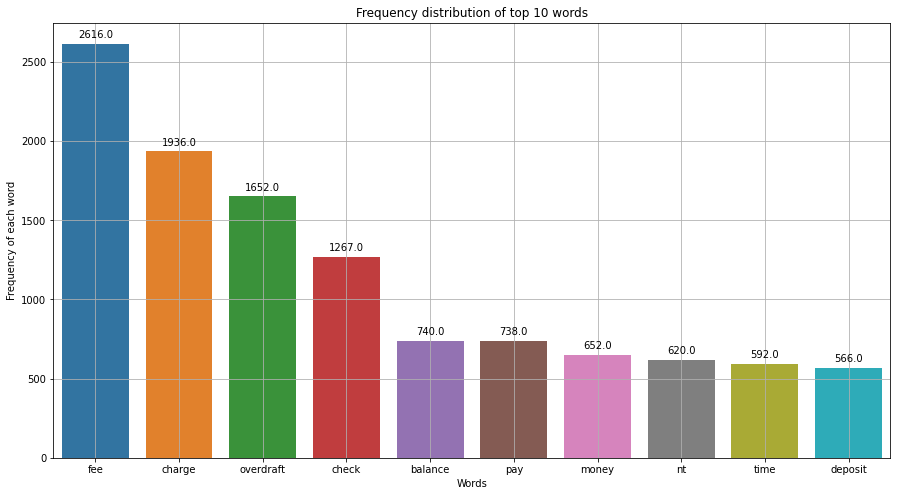

In [382]:
plt.figure(figsize=(15,8))
splot = sns.barplot(y=df_stack[:10],x =top10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Words")
plt.ylabel("Frequency of each word")
plt.title("Frequency distribution of top 10 words")
plt.grid()
plt.show()

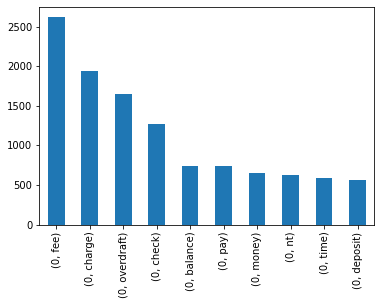

In [327]:
df_stack.nlargest(10).plot(kind="bar")

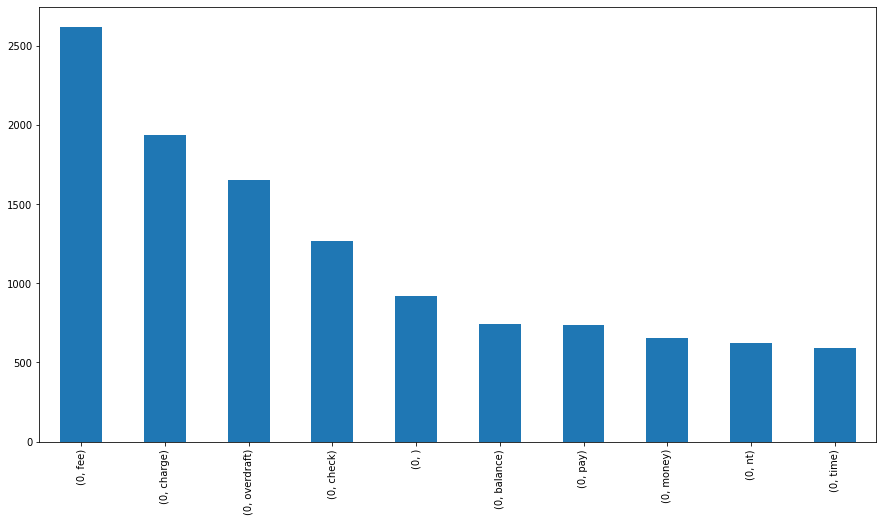

In [180]:
plt.figure(figsize=(15,8))
df_stack[:10].plot(kind="bar")
plt.show()